LAB 6

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

In [4]:
print(data.head)

<bound method NDFrame.head of           neo_id                name  absolute_magnitude  \
0        2162117  162117 (1998 SD15)              19.140   
1        2349507    349507 (2008 QY)              18.500   
2        2455415    455415 (2003 GA)              21.450   
3        3132126           (2002 PB)              20.630   
4        3557844           (2011 DW)              22.700   
...          ...                 ...                 ...   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338197  54456245           (2024 NE)              23.887   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_diameter_max orbiting_body  \
0                     0.394962                0.883161         Earth   
1                     0.530341                1.185878         Earth   
2                     0.136319   

In [5]:
print(data.isnull().sum())

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [6]:
imputer = SimpleImputer(strategy='mean')
data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']] = imputer.fit_transform(
    data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']]
)
print(data.isnull().sum())

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [7]:
#QUESTION A1

#(a)
def sum_unit(inputs, weights, bias):
    #sum of inputs * their weights, + bias
    total = 0
    for i in range(len(inputs)):
        total += inputs[i] * weights[i]
    return total + bias

#(b)
def step(val): #step func
    return 1 if val > 0 else 0

def bipolar_step(val): #bipolar step func
    return 1 if val > 0 else -1

def sigmoid(val): #sigmoid func
    return 1 / (1 + (2.71828 ** -val))

def tanh(val): #tanh funct
    return (2 / (1 + (2.71828 ** (-2 * val)))) - 1

def relu(val):  #relu func
    return max(0, val)

def leaky_relu(val):  #leaky relu func
    return val if val > 0 else 0.01 * val

#(c)
def error_comparator(predicted, actual):
    return actual - predicted

final weights: [-0.1   0.1   0.05]
no. of epochs: 129


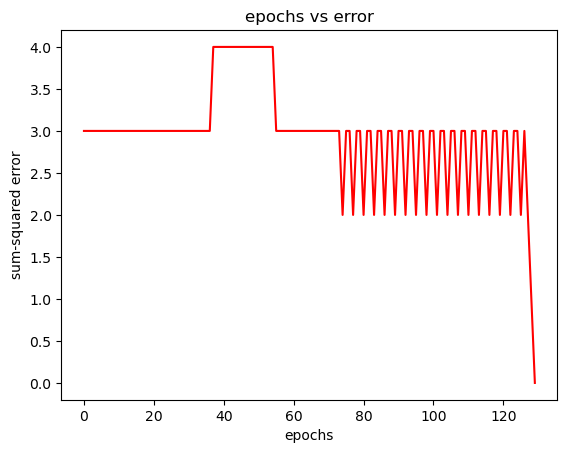

In [8]:
#QUESTION A2

import numpy as np
import matplotlib.pyplot as plt

#perceptron func
def perceptron_train(X, y, W0, W1, W2, alpha, max_epochs=1000, threshold=0.002):
    epochs = 0
    error_history = []
    weights = np.array([W0, W1, W2])
    
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            #input with bias
            inputs = np.append(1, X[i])
            weighted_sum = np.dot(inputs, weights)
            output = step(weighted_sum)
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights = weights + alpha * error * inputs
        
        error_history.append(total_error)
        
        #check convergence
        if total_error <= threshold:
            break
        
        epochs += 1
    
    return weights, epochs, error_history

#AND gate ip and op
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initialize weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

#train perceptron
final_weights, epochs, error_history = perceptron_train(X, y, W0, W1, W2, alpha)

print("final weights:", final_weights)
print("no. of epochs:", epochs)

#plot
plt.plot(range(epochs + 1), error_history, color='red')
plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.title('epochs vs error')
plt.show()


step activation:
final weights: [-0.1   0.1   0.05]
epochs: 130
----------------------------------------
bipolar step activation:
final weights: [-0.1   0.1   0.05]
epochs: 1000
----------------------------------------
sigmoid activation:
final weights: [-6.13531308  3.97083321  3.96394835]
epochs: 1000
----------------------------------------
relu activation:
final weights: [-0.92774472  0.95116001  0.94981086]
epochs: 390
----------------------------------------
leaky relu activation:
final weights: [-0.92927378  0.9530528   0.95175339]
epochs: 433
----------------------------------------


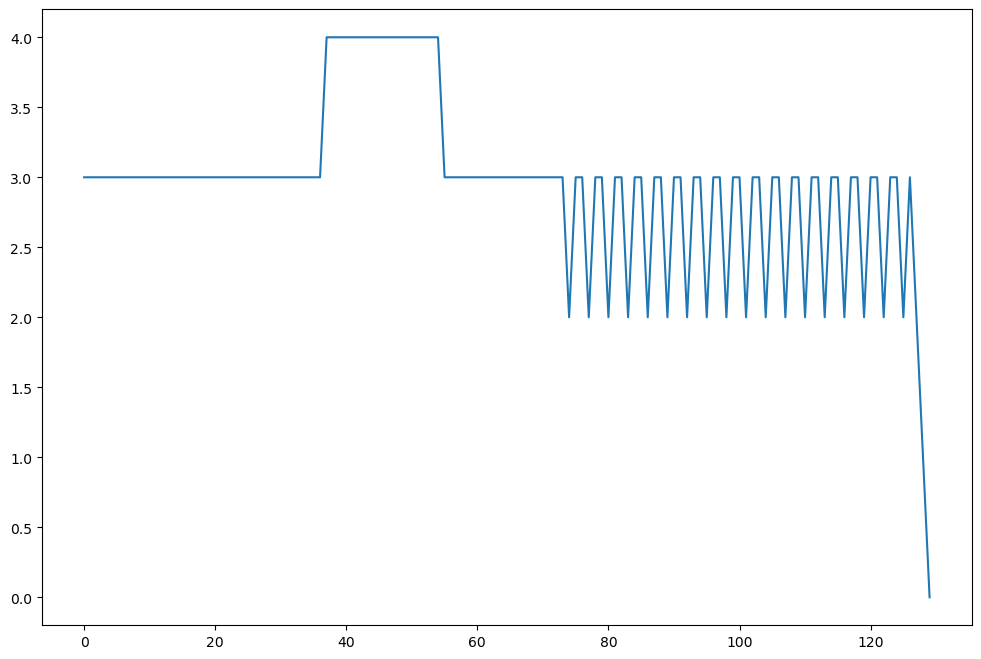

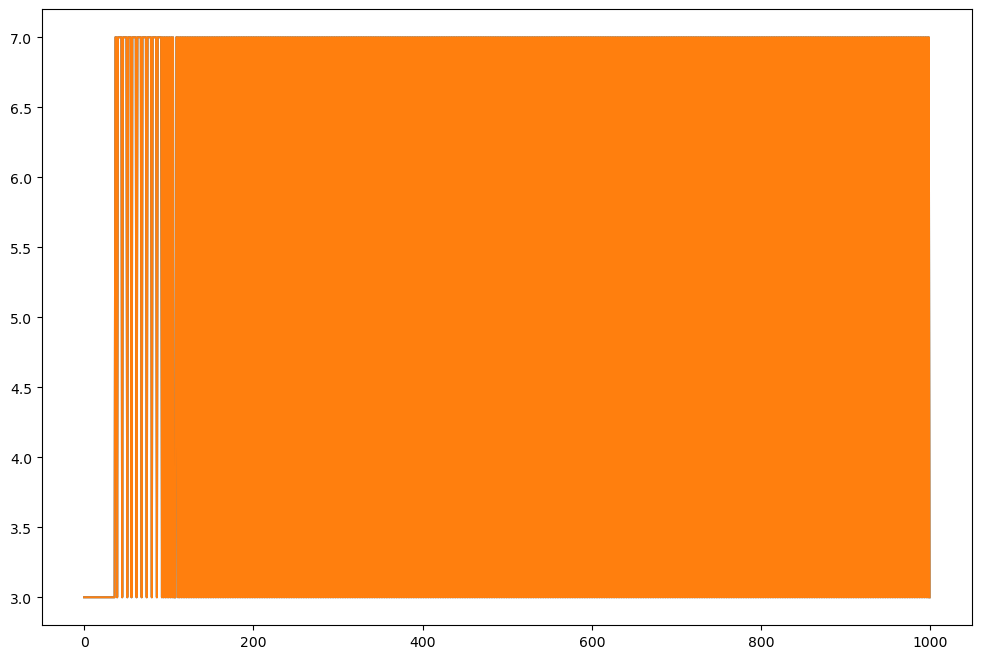

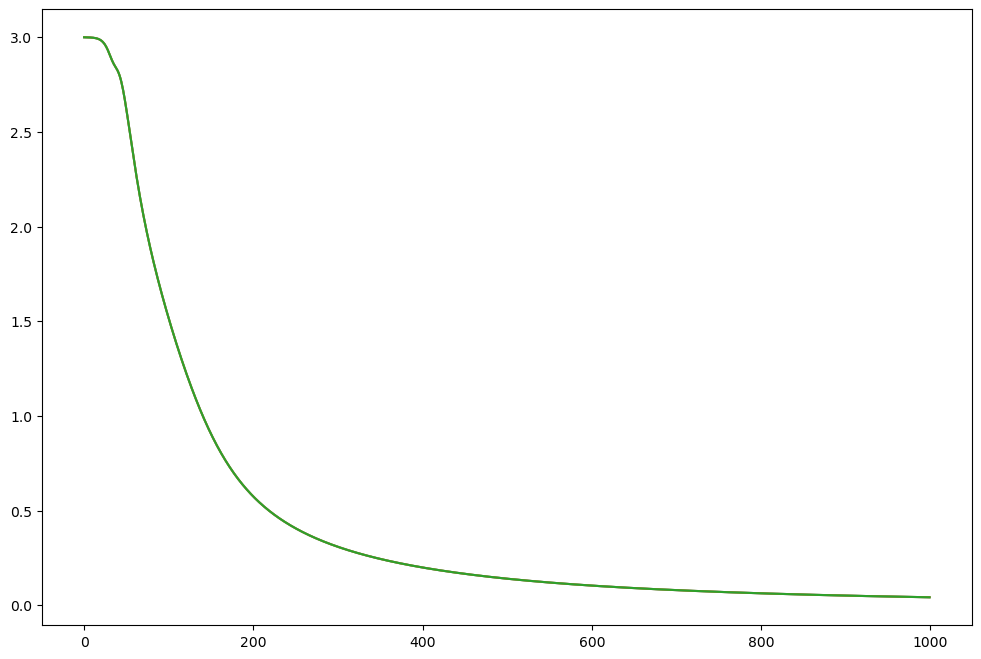

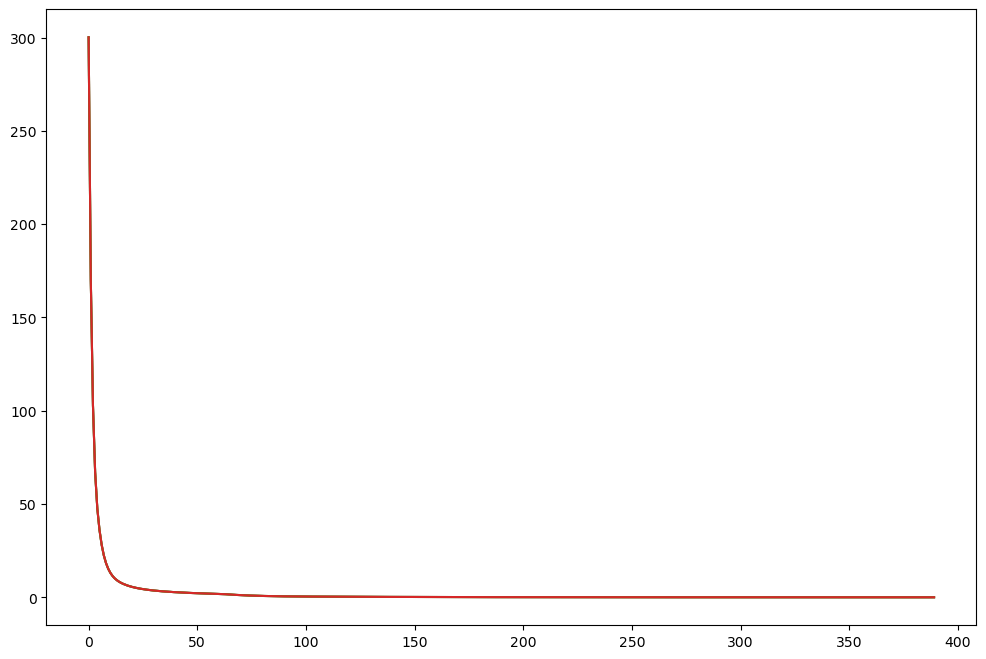

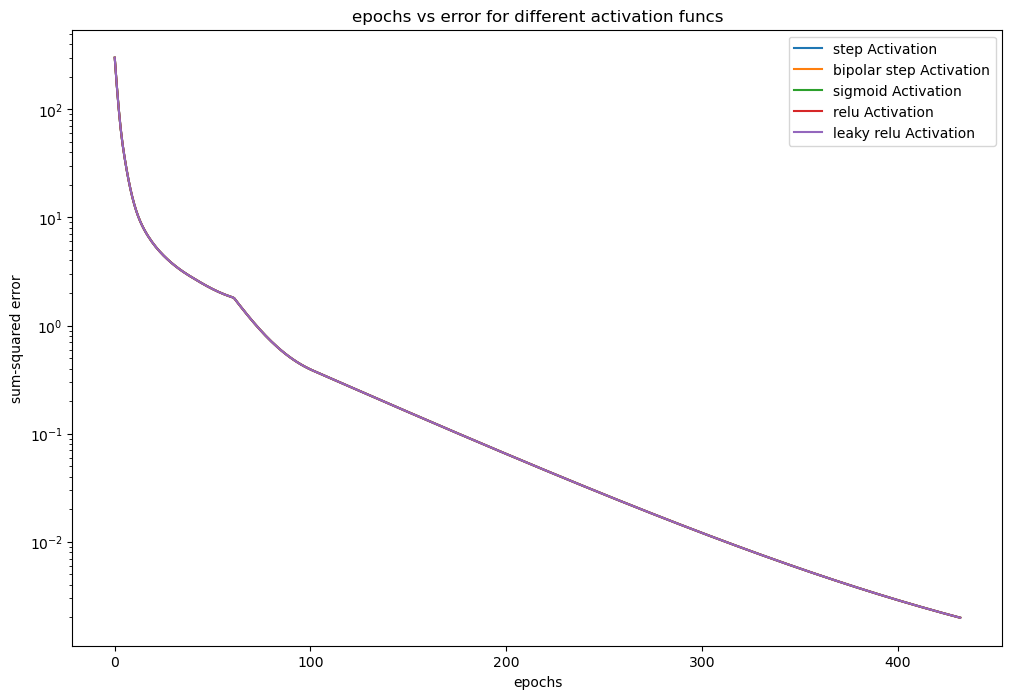

In [44]:
#QUESTION A3

def train_perceptron(X, y, act_func, w0, w1, w2, lr, max_epochs=1000, error_threshold=0.002):
    errors = []
    weights = np.array([w0, w1, w2])
    
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            #add bias input
            inputs = np.append(1, X[i])
            #weighted sum
            weighted_sum = np.dot(inputs, weights)
            #activation function
            output = act_func(weighted_sum)
            #calculate error
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights += lr * error * inputs
        
        errors.append(total_error)
        
        #stop if error below threshold
        if total_error <= error_threshold:
            break
    
    return weights, epoch + 1, errors

#AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
lr = 0.05

#train perceptron with different activation funcs
act_funcs = {
    "step": step,
    "bipolar step": bipolar_step,
    "sigmoid": sigmoid,
    "relu": relu,
    "leaky relu": leaky_relu
}

results = {}

for name, func in act_funcs.items():
    final_weights, epochs, error_history = train_perceptron(X, y, func, w0, w1, w2, lr)
    results[name] = {
        "final_weights": final_weights,
        "epochs": epochs,
        "error_history": error_history
    }
    print(f"{name} activation:")
    print(f"final weights: {final_weights}")
    print(f"epochs: {epochs}")
    print("-" * 40)

    plt.figure(figsize=(12, 8))

    # Plotting the error history
    for name, result in results.items():
        plt.plot(range(len(error_history)), error_history, label=f'{name} Activation')

plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.yscale('log')
plt.title('epochs vs error for different activation funcs')
plt.legend()
plt.show()



Testing learning rate: 0.1
Iteration 0, Weights: [ 0.1   0.05 -0.05], Error: 0.47502081252106
Iteration 1, Weights: [ 0.1         0.09750208 -0.00249792], Error: 0.45140286062111523
Iteration 2, Weights: [0.1        0.14264237 0.04264237], Error: 0.429158631982389
Iteration 3, Weights: [0.1        0.18555823 0.08555823], Error: 0.4082712727946436
Iteration 4, Weights: [0.1        0.22638536 0.12638536], Error: 0.3887022058981765
Iteration 5, Weights: [0.1        0.26525558 0.16525558], Error: 0.3703976767255298
Iteration 6, Weights: [0.1        0.30229535 0.20229535], Error: 0.3532941194220418
Iteration 7, Weights: [0.1        0.33762476 0.23762476], Error: 0.3373223847607504
Iteration 8, Weights: [0.1      0.371357 0.271357], Error: 0.3224109535413109
Iteration 9, Weights: [0.1        0.40359809 0.30359809], Error: 0.30848829357201935
Iteration 10, Weights: [0.1        0.43444692 0.33444692], Error: 0.2954845225132515
Iteration 11, Weights: [0.1        0.46399537 0.36399537], Error: 

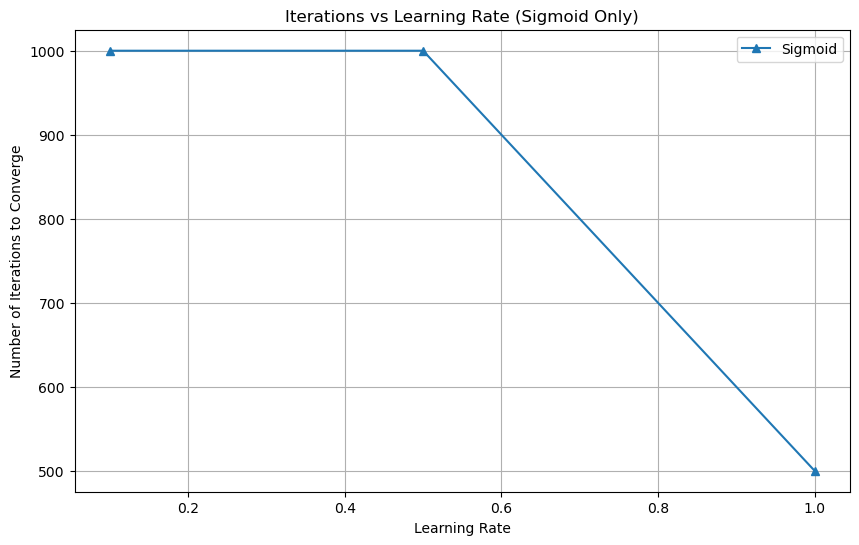

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

# Inputs and target
inputs = np.array([1, 1])  # Simplified inputs
target = 1  # Expected output target
initial_weights = [0.1, 0.05, -0.05]  # Small initial weights
learning_rates = [0.1, 0.5, 1]  # Test only 3 learning rates

# Learning function for sigmoid
def learn_sigmoid(inputs, initial_weights, learning_rate, target, max_iters=1000, tolerance=0.001):
    w = np.array(initial_weights)  # Start with initial weights
    iterations = 0
    
    for i in range(max_iters):
        weighted_sum = w[0] + w[1] * inputs[0] + w[2] * inputs[1]
        prediction = sigmoid(weighted_sum)
        error = target - prediction
        
        # Print weights and error to debug
        print(f"Iteration {i}, Weights: {w}, Error: {error}")
        
        if abs(error) < tolerance:  # Convergence condition
            break
        
        # Update weights with learning rate
        w[1] += learning_rate * error * inputs[0]
        w[2] += learning_rate * error * inputs[1]
        
        iterations += 1
    
    return iterations

# Store iterations for each learning rate
iterations_dict = []

# Perform learning with different learning rates
for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    iterations = learn_sigmoid(inputs, initial_weights, lr, target)
    iterations_dict.append(iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, iterations_dict, label='Sigmoid', marker='^')

plt.title('Iterations vs Learning Rate (Sigmoid Only)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.legend()
plt.grid(True)
plt.show()
